In [11]:
import pandas as pd
import matplotlib.pyplot as mat
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
myDF = pd.read_csv("income.csv")
myDF

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [3]:
myDF = myDF.rename(columns = {"Income($)":"Income"})
myDF

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [7]:
km = KMeans(n_clusters=3)
predicted_cluster = km.fit_predict(myDF[["Age","Income"]])
myDF["cluster_category"] = predicted_cluster
myDF

,Name,Age,Income,cluster_category
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0
9,Angelina,35,130000,0


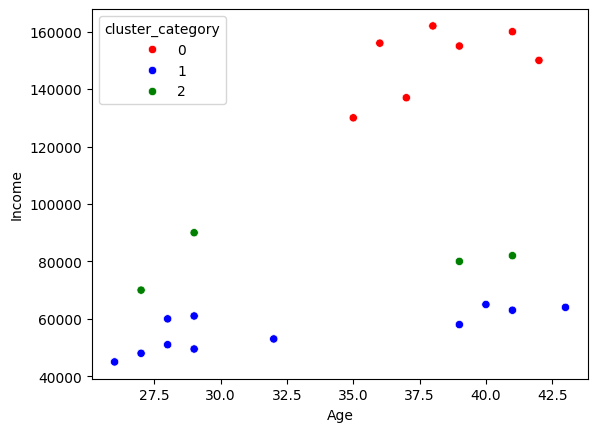

In [10]:
sb.scatterplot(data=myDF,x="Age",y="Income",hue="cluster_category",palette=["r","b","g"])
mat.show()

## cluster is still not looking good, so make it more pure

In [14]:
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(myDF[["Income"]])
myDF["Income"] = min_max_scaler.transform(myDF[["Income"]])

min_max_scaler.fit(myDF[["Age"]])
myDF["Age"] = min_max_scaler.transform(myDF[["Age"]])
myDF

,Name,Age,Income,cluster_category
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [15]:
predicted_res = km.fit_predict(myDF[["Age","Income"]])
myDF["cluster_category"] = predicted_res
myDF

,Name,Age,Income,cluster_category
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


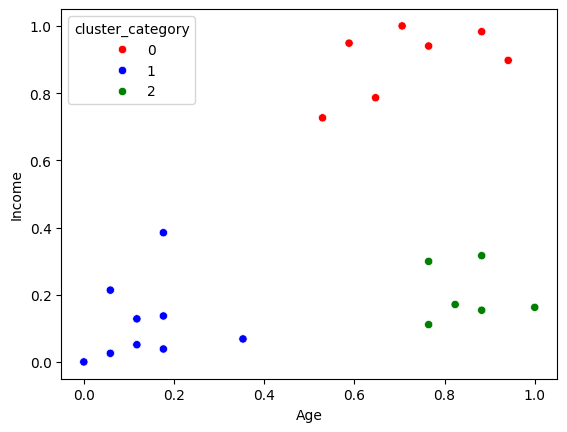

In [19]:
sb.scatterplot(data=myDF,x="Age",y="Income",hue="cluster_category",palette=["r","b","g"])
mat.show()

## Cluster is looking good, lets find the centroid 

In [17]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

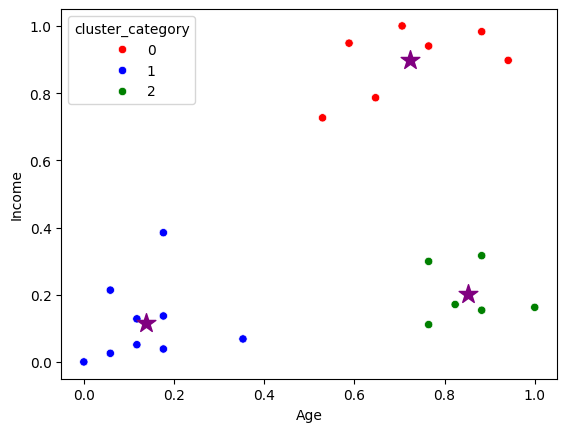

In [27]:
sb.scatterplot(data=myDF,x="Age",y="Income",hue="cluster_category",palette=["r","b","g"])

mat.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c="purple",marker="*",s=200,label="centroid")
mat.show()